In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
station = "Jyväskylä Jyskä"

In [2]:
df = pd.read_csv("../hourly2.csv")


df = df[df["Havaintoasema"] == station]
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.date
df['Hour'] = df['Date'].dt.hour

In [3]:
days_with_routes = df[df['Alueet'] >= 1]['Day'].unique()

def assign_color(value):
    if value == 0:
        return 'blue'
    elif value == 1:
        return 'green'
    elif value == 2:
        return 'yellow'
    elif value == 3:
        return 'red'
    
def assign_label(value):
    if value == 0:
        return 'Ei reittejä'
    elif value == 1:
        return 'Reittejä 1000m säteellä'
    elif value == 2:
        return 'Reittejä 500m säteellä'
    elif value == 3:
        return 'Reittejä 100m säteellä'

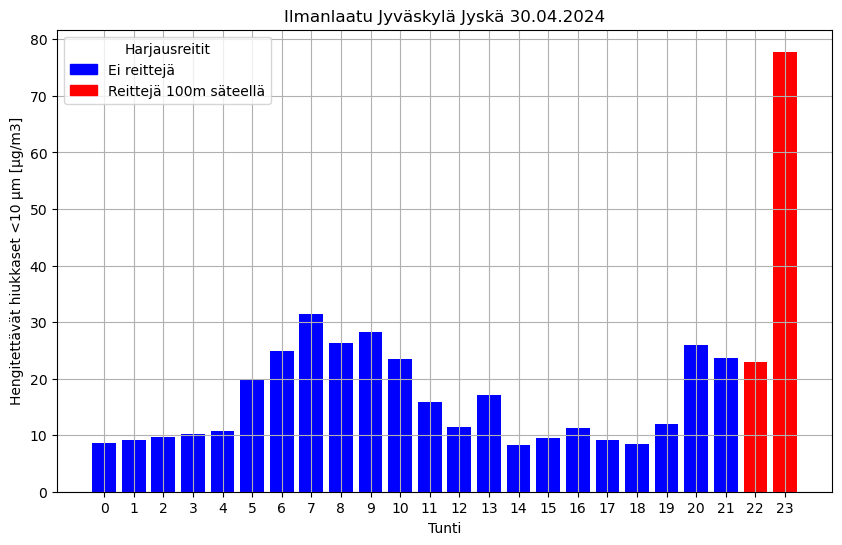

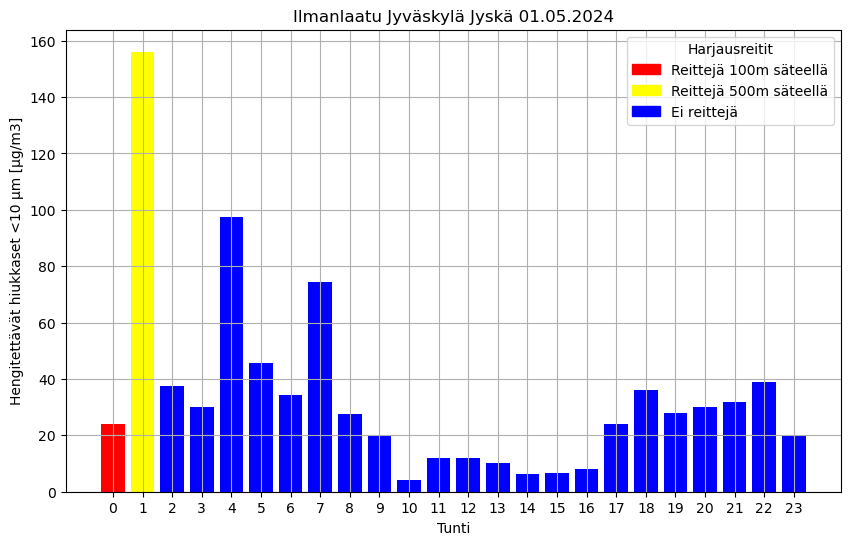

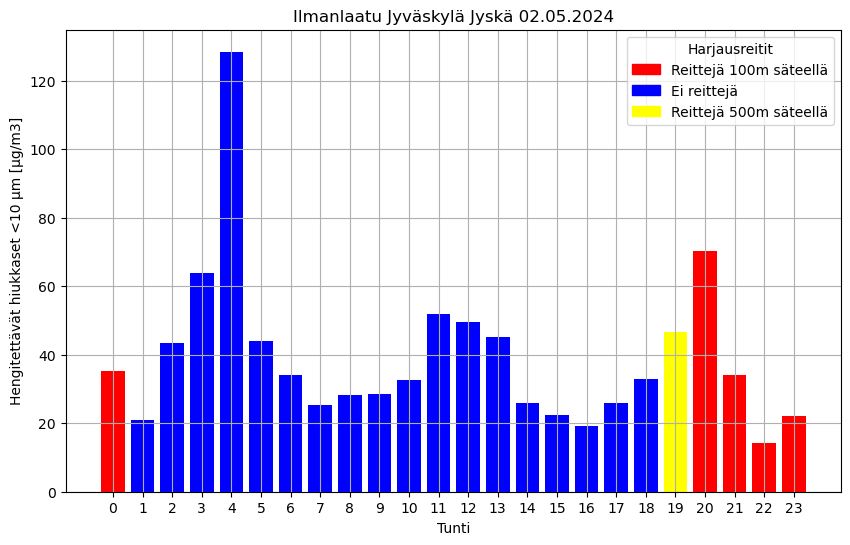

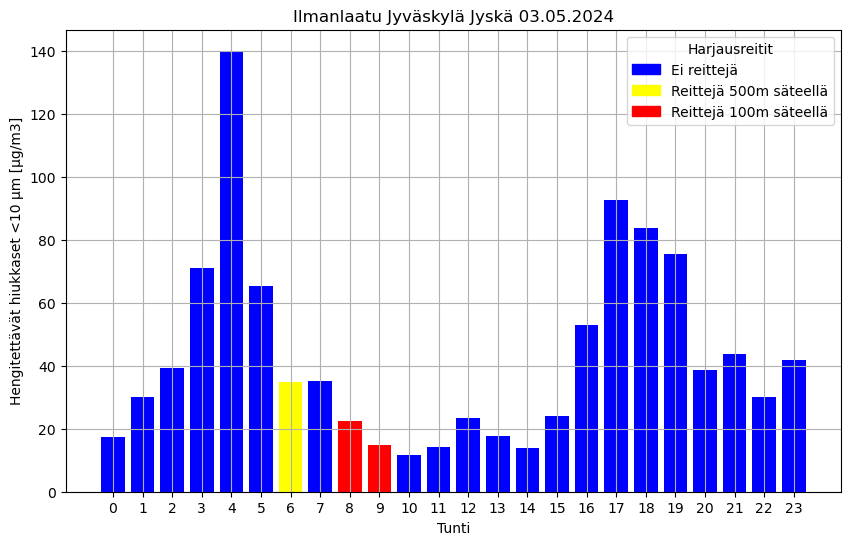

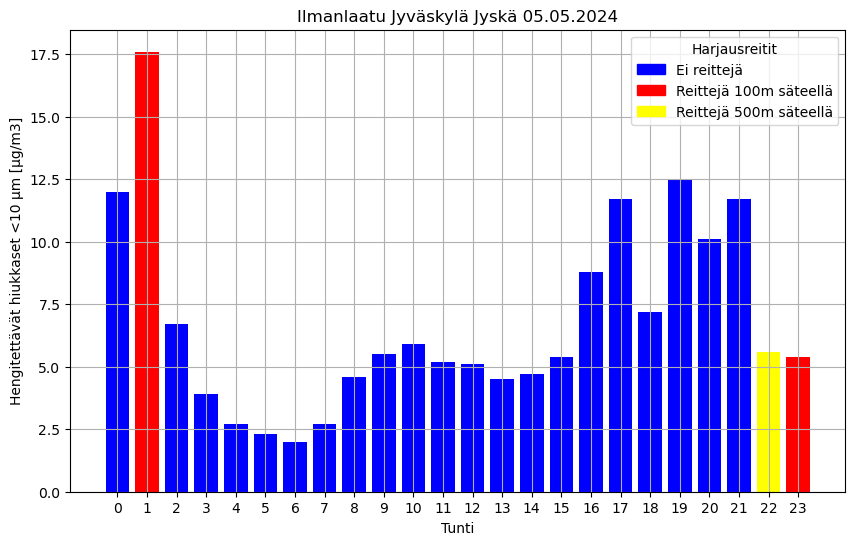

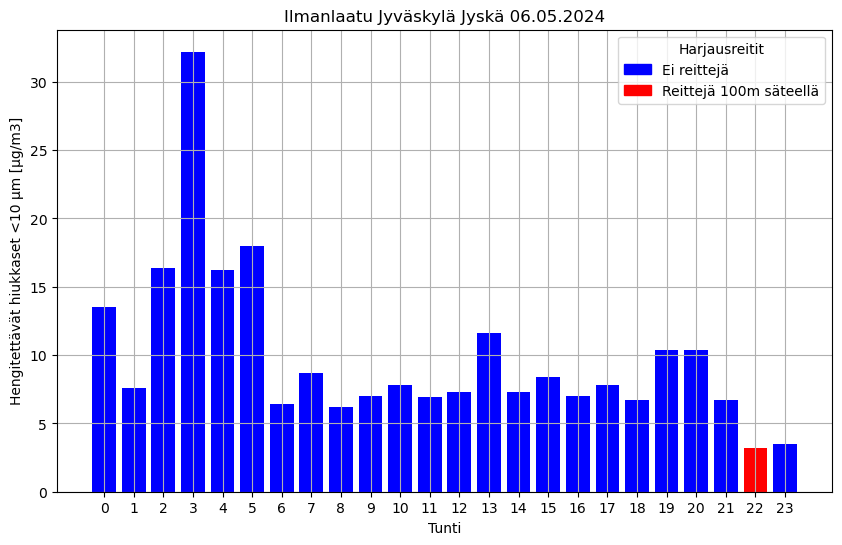

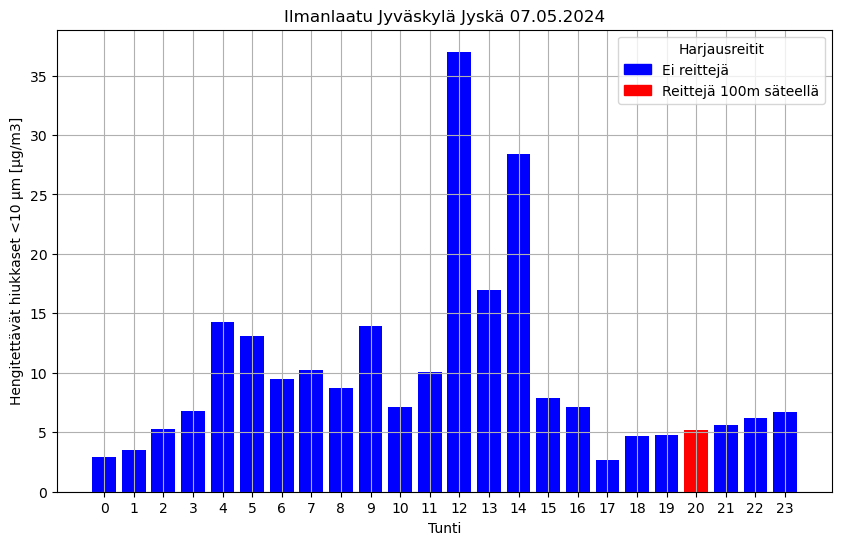

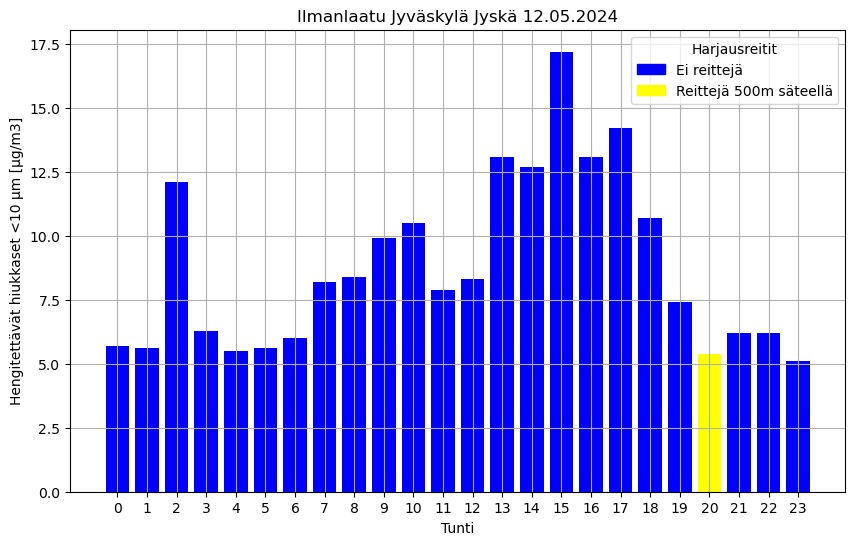

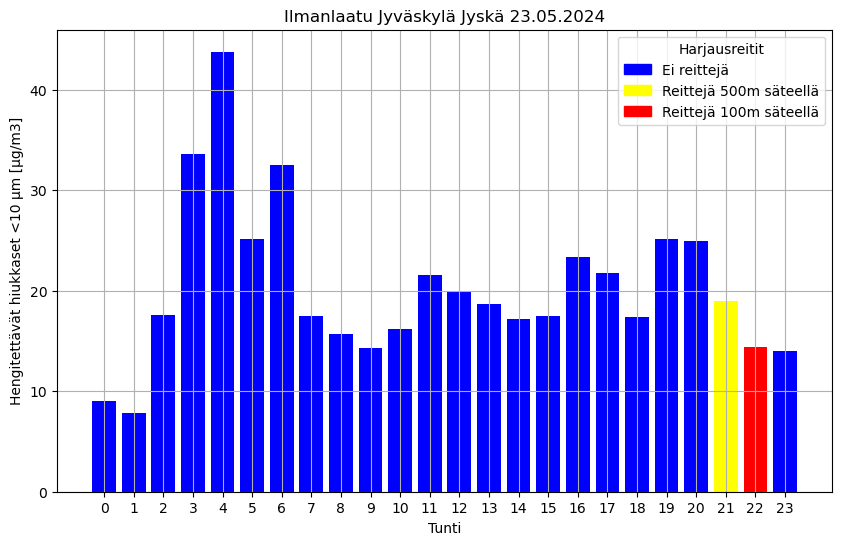

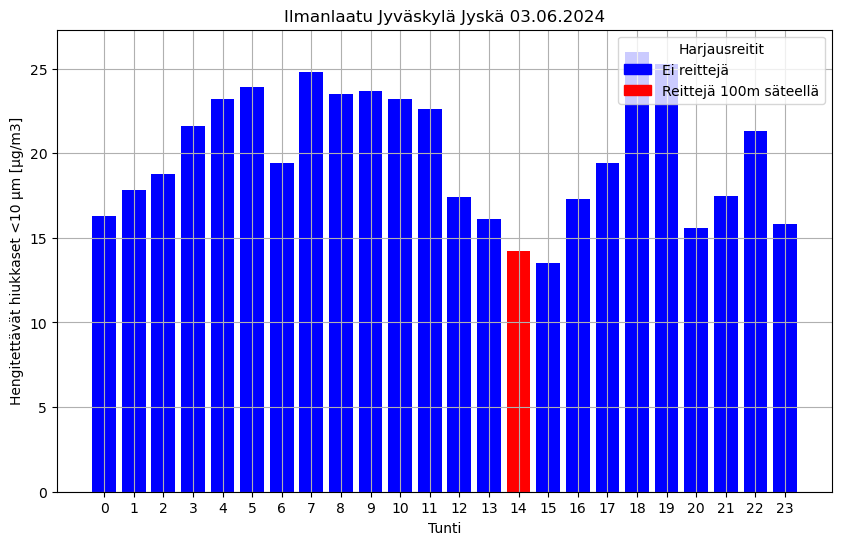

In [4]:
for day in days_with_routes:
    daily_data = df[df['Day'] == day]
    
    colors = [assign_color(x) for x in daily_data['Alueet']]
    
    plt.figure(figsize=(10, 6))
    plt.bar(daily_data['Hour'], daily_data['Hengitettävät hiukkaset <10 µm [µg/m3]'], color=colors)
    plt.xlabel('Tunti')
    plt.ylabel('Hengitettävät hiukkaset <10 µm [µg/m3]')
    day = pd.to_datetime(day).strftime('%d.%m.%Y')
    plt.title(f'Ilmanlaatu {station} {day}')
    plt.xticks(range(0, 24))
    plt.grid(True)

    unique_values = daily_data['Alueet'].unique()
    legend_labels = [Patch(color=assign_color(val), label=assign_label(val)) for val in unique_values]
    plt.legend(handles=legend_labels, title="Harjausreitit")

    plt.show()